# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [1]:
import pandas as pd

#ToDo: 1. Ersetzen Sie im Dateinamen xy durch entsprechende Matrikelnummer
#      2. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen
data = pd.read_csv('sr_aufg_1_29.txt', 
                   sep=';', #durch ; werden die Werte in der csv Datei getrennt
                   encoding='unicode_escape', #gibt die Zeichencodierung für Sonderzeichen an
                   na_values='.', #festgelegt Welche werte als fehlend behandelt werden
                   header = None, #es gibt in der csv Datei keine Überschrift/Header
                   names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum']) #Es werden neue Spaltennamen für die einzelnen Werte erstellt
pd.set_option('display.max_rows',None) # zeigt immer alle eingelesenen Daten
data #zeigt die komplette Tabelle
data.head(5) #zeigt nur die in der Klammer gegebenen Anzahl an Einträgen an

,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum
0,1,Herr,Klaus,Kraus,07.08.1959
1,2,Herr,Rudolf,Mann,02.02.1987
2,3,Herr,Rainer,Bader,03.11.1942
3,4,Frau,Stefanie,Schäfer,04.02.1953
4,5,Herr,Klaus,Rieger,12.05.1958


## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://drive.google.com/uc?id=1z5Gydg1HzoxZLo428862fsgsKyaHKKm9)

In [2]:
# Indexe wo Veränderungen/Löschungen vorgenommen werden
index = [8,11,19,28,69,74,75,78,88,96,99,104] # Liste mit Indices die herausgefiltert werden sollen 
new_data = pd.DataFrame() # ein leeres Dataframe anlegen, in dem die entsprechenden Datenzeilen abgespeichert werden sollen

# mithilfe der for-Schleife über Liste mit Indices iterieren
for i in index:
    new_data = pd.concat([new_data, data.loc[i].to_frame().T],axis=0)

#Die neuen Spalten Datensatz und Typ des Fehlers generieren
new_data.loc[[8, 28, 69, 99], 'Datensatz?'] = 'Korrektur'
new_data.loc[[11, 19, 74, 75, 78, 88, 96, 104], 'Datensatz?'] = 'Löschen'
new_data.loc[[8, 28, 69, 99], 'Typ des Fehlers'] = 'Monat reicht für Alter'
new_data.loc[[11, 19, 74, 75, 78, 88, 96, 104], 'Typ des Fehlers'] = 'Unsinn'


#dictionary erstellen mit den Indexen an denen das Geburtsdatum verändert wird zu dem angegebenen Datum
geburtstage ={
    8:'20.12.1968',
    28: '27.07.1962',
    69: '31.10.1987',
    99: '12.11.1981'  
}
#for-Schleife, welche solange läuft wie das Dictionary lang ist und die Geburtstage in den Zeilen ändert
for index, geburtstage in geburtstage.items():
    data.at[index, 'Geburtsdatum']= geburtstage #in Zeile von Index in der Spalte von Geburtsdatum, findet Änderung statt

#Name angepasst bei Index 99
data.at[99,'Vorname'] = 'Thorsten'
data.at[99,'Nachname'] = 'Schultheiß'


#hier werden die einzelnen Zeilen an den entsprechenden Indexen rausgelöscht
data=data.drop([11, 19, 74, 75, 78, 88, 96, 104], axis=0)

data = data.reset_index()           # index zurücksetzen, allerdings wird alter Index noch angezeigt
data = data.drop('index', axis = 1) # Spalte mit altem Index löschen

new_data





,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum,Datensatz?,Typ des Fehlers
8,9,Herr,Gerhard,Albrecht,"December 20th, 1968",Korrektur,Monat reicht für Alter
11,12,Frau,Brigitte,Kirchner,jTwESPbrlT,Löschen,Unsinn
19,20,Herr,Friedrich,Frisch,11.,Löschen,Unsinn
28,29,Herr,Stefan,Schwab,am 27. Juli 1962,Korrektur,Monat reicht für Alter
69,70,Herr,Dieter,Weiß,"October 31st, 1987",Korrektur,Monat reicht für Alter
74,75,Frau,Brigitte,Kaiser,24.01.2490,Löschen,Unsinn
75,76,Frau,Sophia,Müller,unbekannt,Löschen,Unsinn
78,79,Frau,Regina,Lenz,14.10.1810,Löschen,Unsinn
88,89,Herr,Jürgen,Winkler,,Löschen,Unsinn
96,97,Herr,Simon,Ebert,26.01.,Löschen,Unsinn


## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [3]:
#richtiges Datumsformat mit pd.to_datetime sicherstellen
data['Geburtsdatum'] = pd.to_datetime(data['Geburtsdatum'], format='%d.%m.%Y')

#hier wird das Datum extrahiert und in Geburtsjahr gespeichert, neue Spalte Geburtsjahr gespeichert
#da data['Geburtsjahr'] es wird data also die Spalte Geburtsjahr hinzugefügt und mit den Jahren aus 'Geburtsdatum' aufgefüllt
data['Geburtsjahr'] = data['Geburtsdatum'].dt.year

#hier wird das Alter zum Stichtag berechnet, da der Stichtag am 31.12 ist beinhaltet er das komplette Jahr 2005
#da er das komplette Jahr beinhaltet sind die Monate und Tage der Personen unbedeutend für die Anzahl der Lebensjahre
data['Alter']=2005-data['Geburtsjahr']
data.head(5)


,Pers.Nr.,Anrede,Vorname,Nachname,Geburtsdatum,Geburtsjahr,Alter
0,1,Herr,Klaus,Kraus,1959-08-07,1959,46
1,2,Herr,Rudolf,Mann,1987-02-02,1987,18
2,3,Herr,Rainer,Bader,1942-11-03,1942,63
3,4,Frau,Stefanie,Schäfer,1953-02-04,1953,52
4,5,Herr,Klaus,Rieger,1958-05-12,1958,47


## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1f7Vz3JuSa958w8-dBTnPSI24hJxWa17F" width="300"/>
</div>

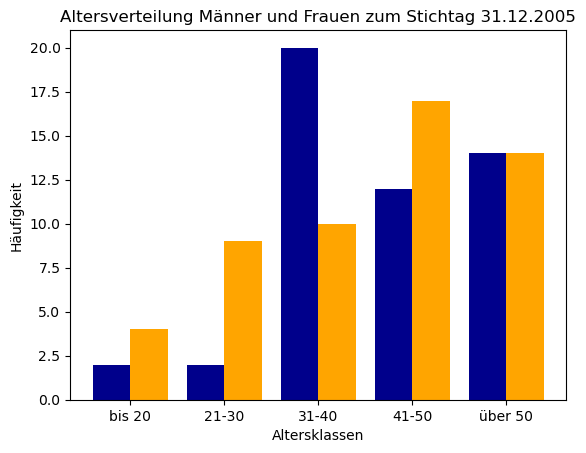

,Altersklassen,Anzahl,Anzahl Frauen,Anzahl Männer
0,bis 20,6,2,4
1,21-30,11,2,9
2,31-40,30,20,10
3,41-50,29,12,17
4,über 50,28,14,14


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Erstellen der Altersklassen
Grenzen = [0, 20, 30, 40, 50, float('inf')]
Altersklasse = ['bis 20', '21-30', '31-40', '41-50', 'über 50']

# die einzelnen Altersklassen abspeichern in DataFrame in neuer Spalte mit Namen 'ALtersklassen'
_altersklassen = pd.cut(data['Alter'], Grenzen, labels=Altersklasse) 
data['Altersklassen'] = _altersklassen # Dataframe kann durch Bezeichnung einer neuen Spalte erweitert werden

#DataFrames für Frauen und Männer erzeugen
frauen = data[data['Anrede']=='Frau'] 
maenner = data[data['Anrede']=='Herr']

#Die Anzahl der Personen in jeder Altersklasse werden gezählt mit value_counts()
#erstellen eines komplett neuen DataFrames
alter_klassen_anzahl = data['Altersklassen'].value_counts(sort=False).reset_index()
alter_klassen_anzahl.columns = ['Altersklassen', 'Anzahl']

#Die Anzahl der Frauen in jeder Altersklasse zählen
alter_klassen_anzahl_frauen = frauen['Altersklassen'].value_counts(sort=False).reset_index()
alter_klassen_anzahl_frauen.columns = ['Altersklassen', 'Anzahl Frauen']

# Dann die beiden DataFrames mithilfe der Altersklassen zusammenführen
alter_klassen_anzahl = pd.merge(alter_klassen_anzahl, alter_klassen_anzahl_frauen, on='Altersklassen', how='left')

# Zuerst die Anzahl der Männer in jeder Altersklasse zählen
alter_klassen_anzahl_maenner = maenner['Altersklassen'].value_counts(sort=False).reset_index()
alter_klassen_anzahl_maenner.columns = ['Altersklassen', 'Anzahl Männer']

# Dann die beiden DataFrames mithilfe der Altersklassen zusammenführen
alter_klassen_anzahl = pd.merge(alter_klassen_anzahl, alter_klassen_anzahl_maenner, on='Altersklassen', how='left')



# Erstellen des Säulendiagramms
fig, ax = plt.subplots()

xAxis = np.arange(len(alter_klassen_anzahl['Altersklassen'][0:5])) # es wird ein numpy-Array erzeugt

plt.bar(xAxis - 0.2, alter_klassen_anzahl['Anzahl Frauen'][0:5], width=0.4, color='darkblue')
plt.bar(xAxis + 0.2, alter_klassen_anzahl['Anzahl Männer'][0:5], width=0.4, color='orange')

plt.xticks(xAxis, alter_klassen_anzahl['Altersklassen'][0:5])
plt.xlabel('Altersklassen')  # Beschriftung der x-Achse
plt.ylabel('Häufigkeit')  # Beschriftung der y-Achse
plt.title('Altersverteilung Männer und Frauen zum Stichtag 31.12.2005')  # Titel oberhalb des Diagramms
plt.show()






alter_klassen_anzahl








## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=17Z5Z8OgKw3DE4U_vD3axd7vhkkkD-N9m" width="300"/>
</div>

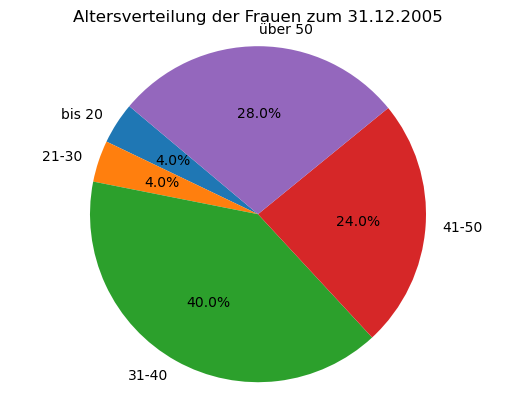

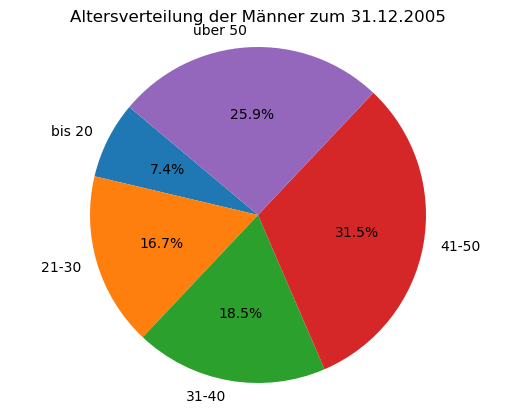

,Altersklassen,Anzahl,Anzahl Frauen,Anzahl Männer,rel. Häufigkeit in % Männer,rel. Häufigkeit in % Frauen
0,bis 20,6,2,4,7.41,4.0
1,21-30,11,2,9,16.67,4.0
2,31-40,30,20,10,18.52,40.0
3,41-50,29,12,17,31.48,24.0
4,über 50,28,14,14,25.93,28.0


In [5]:
#relative Häufigkeit der Männer
n = alter_klassen_anzahl['Anzahl Männer'].sum()
alter_klassen_anzahl['rel. Häufigkeit in % Männer'] = (alter_klassen_anzahl['Anzahl Männer'] / n * 100).round(2) # neue Spalte für h_n wird durch Nennung angelegt

#relative Häufigkeit der Frauen
n = alter_klassen_anzahl['Anzahl Frauen'].sum()
alter_klassen_anzahl['rel. Häufigkeit in % Frauen'] = (alter_klassen_anzahl['Anzahl Frauen'] / n * 100).round(2) # neue Spalte für h_n wird durch Nennung angelegt

# Erstellen des Tortendiagramms Frauen
plt.pie(alter_klassen_anzahl['rel. Häufigkeit in % Frauen'], labels=alter_klassen_anzahl['Altersklassen'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Altersverteilung der Frauen zum 31.12.2005')
plt.show()

# Erstellen des Tortendiagramms Männer
plt.pie(alter_klassen_anzahl['rel. Häufigkeit in % Männer'], labels=alter_klassen_anzahl['Altersklassen'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Altersverteilung der Männer zum 31.12.2005')
plt.show()

alter_klassen_anzahl

## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1adhKBVlds5OlO-9B5CClT2ybPolv5wVW" width="300"/>
</div>

In [6]:
# Gesamtkennzahlen für alle Beschäftigten
gesamt_kennzahlen = {'alle Beschäftigten': [data['Alter'].mean(),
                                            data['Alter'].var(),
                                            data['Alter'].std(),
                                            data['Alter'].median(),
                                            data['Alter'].max() - data['Alter'].min()],


                                            # Kennzahlen für Frauen
                                 'Frauen': [frauen['Alter'].mean(),
                                            frauen['Alter'].var(),
                                            frauen['Alter'].std(),
                                            frauen['Alter'].median(),
                                            frauen['Alter'].max() - frauen['Alter'].min()],


                                            # Kennzahlen für Männer
                                  'Männer':[maenner['Alter'].mean(),
                                            maenner['Alter'].var(),
                                            maenner['Alter'].std(),
                                            maenner['Alter'].median(),
                                            maenner['Alter'].max() - maenner['Alter'].min()],
                                            }

# Anzeigen der Kennzahlen
key_frame = pd.DataFrame(gesamt_kennzahlen, index=['Mittelwert', 'emp. Varianz', 'emp. Std.-Abw.', 'emp. Median', 'Spannweite'])
key_frame.round(4)



,alle Beschäftigten,Frauen,Männer
Mittelwert,42.3558,43.3200,41.4630
emp. Varianz,145.7654,124.4669,166.5175
emp. Std.-Abw.,12.0733,11.1565,12.9042
emp. Median,43.0000,41.0000,43.0000
Spannweite,46.0000,45.0000,46.0000
